<a href="https://colab.research.google.com/github/masrik-dev/Deep-Learning-with-TensorFlow-and-Python/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Introduction to Regression with Neural Networks in TensorFlow

 There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.18.0


# Creating data to view and fit

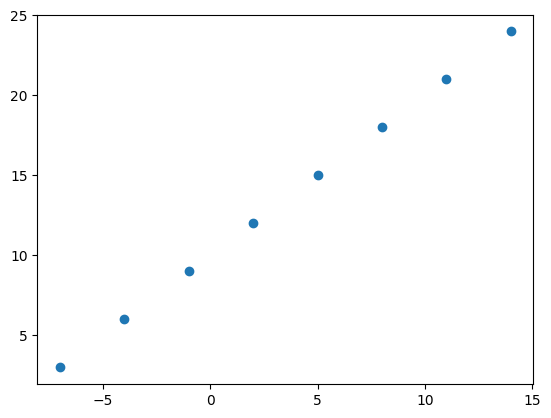

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, Y);

In [3]:
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], Y[0]

(np.float64(-7.0), np.float64(3.0))

In [6]:
X[1], Y[1]

(np.float64(-4.0), np.float64(6.0))

In [7]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

((8,), (8,))

In [8]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

((), ())

In [9]:
X[0].ndim

0

In [10]:
X[0], Y[0]

(np.float64(-7.0), np.float64(3.0))

In [11]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
Y = tf.cast(tf.constant(Y), dtype=tf.float32)
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
X.ndim, Y.ndim

(1, 1)

In [13]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

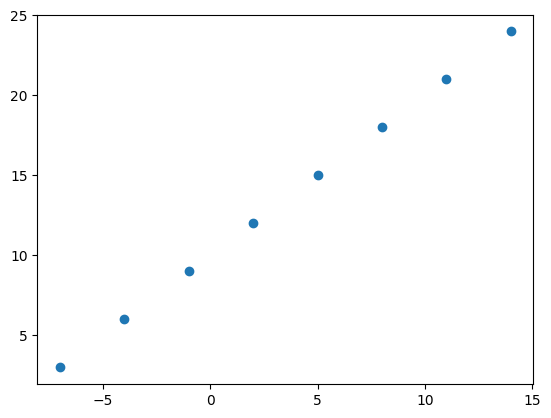

In [14]:
plt.scatter(X, Y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input an doutput layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is), the optimizer (tells our model how to improve the patterns its learning), and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & Y (feqtures and labels).


In [15]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
# model.fit(X, Y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 15.8755 - mae: 15.8755
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 15.5942 - mae: 15.5942
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - loss: 15.3130 - mae: 15.3130
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - loss: 15.0317 - mae: 15.0317
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - loss: 14.8186 - mae: 14.8186


In [16]:
# Check out X and Y
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
# Try and make a prediction using this model
P = model.predict(np.array([17.0])) # make input as NumPy array
T = model.predict(tf.constant([17.0])) # make input as Tensor
P, T

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


(array([[-5.915549]], dtype=float32), array([[-5.915549]], dtype=float32))

In [18]:
model.predict(tf.constant([20.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


array([[-6.966528]], dtype=float32)

### **Improving our model**

We can improve our model, by altering the steps we took to create a model.
1. **Creating a model** - here we might add more layers, increase the number of hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [19]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 7.5628 - mae: 7.5628
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 7.4925 - mae: 7.4925
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 7.4869 - mae: 7.4869
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 7.4813 - mae: 7.4813
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - loss: 7.4756 - mae: 7.4756
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - loss: 7.4700 - mae: 7.4700
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 7.4644 - mae: 7.4644
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 7.4588 - mae: 7.4588
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - loss: 7.4531 - mae: 7.4531
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 7.4475 - mae: 7.4475
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - loss: 7.4419 - mae: 7.4419
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - loss: 7.4363 - mae: 7.4363
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71

In [20]:
# Remind ourselves of the data
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [21]:
# Let's see if our model's prediction has improved
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


array([[30.185549]], dtype=float32)

### **Let's update our model again**

In [22]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.7579 - mae: 12.7579
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - loss: 12.1379 - mae: 12.1379
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 11.5158 - mae: 11.5158
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 10.8924 - mae: 10.8924
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - loss: 10.2489 - mae: 10.2489
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 9.5755 - mae: 9.5755
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 8.8700 - mae: 8.8700
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 8.1307 - mae: 8.1307
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 7.3458 - mae: 7.3458
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - loss: 6.5076 - mae: 6.5076
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 5.6098 - mae: 5.6098
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 4.6527 - mae: 4.6527
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━

In [23]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [24]:
# Let's see if our model's prediction has improved
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[32.404728]], dtype=float32)

### **Let's improve our model again**

* Next, increase the number of hidden units (we already tried **tf.keras.layers.Dense(100, activation="relu")**), so we skip this part.
* Now, we will change the **activation function**

In [25]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step - loss: 14.1712 - mae: 14.1712
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 13.6515 - mae: 13.6515
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 13.1341 - mae: 13.1341
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 12.6162 - mae: 12.6162
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 12.0951 - mae: 12.0951
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 11.5681 - mae: 11.5681
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 11.0325 - mae: 11.0325
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 10.4856 - mae: 10.4856
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 9.9245 - mae: 9.9245
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 9.3463 - mae: 9.3463
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 8.7481 - mae: 8.7481
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 8.1268 - mae: 8.1268
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━

In [26]:
# Let's remember our data again
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [27]:
# Let test our model
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[29.50412]], dtype=float32)

### **Again, Let improve our model**
* Change the optimization function from **SGD** to **Adam**

In [28]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.5050 - mae: 12.5050
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 12.4059 - mae: 12.4059
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 12.3067 - mae: 12.3067
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 12.2074 - mae: 12.2074
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 12.1080 - mae: 12.1080
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 12.0084 - mae: 12.0084
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.9087 - mae: 11.9087
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 11.8089 - mae: 11.8089
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 11.7088 - mae: 11.7088
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.6086 - mae: 11.6086
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 11.5083 - mae: 11.5083
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 11.4077 - mae: 11.4077
Epoch 13/100
1/1 ━━━━━━━

In [29]:
# Let's remember our data again
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [30]:
# Test our model
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[30.911057]], dtype=float32)

### **Let's improve our model again**
* Change the **learning rate = lr** of the optimization function **Adam()**

In [31]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # default lr= 0.001
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 932ms/step - loss: 13.8626 - mae: 13.8626
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 12.8988 - mae: 12.8988
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 11.9308 - mae: 11.9308
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 10.9526 - mae: 10.9526
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 9.9573 - mae: 9.9573
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 8.9380 - mae: 8.9380
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 7.8875 - mae: 7.8875
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 6.7987 - mae: 6.7987
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 6.8432 - mae: 6.8432
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 7.3110 - mae: 7.3110
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 7.6892 - mae: 7.6892
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.7087 - mae: 7.7087
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [32]:
# Let's remember our data again
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [33]:
# Let's test our model
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


array([[28.047567]], dtype=float32)

### **Almost correct prediction but not super good**

> when it comes to evaluation... **Visualize it**

It's a good idea to visualize:
* **The Data -** what data are we working with? What does it look like?
* **The model itself -** what does our model look like?
* **The training of a model -** how does a model perform while it learns?
* **The predictions of the model -** how do the predictions of a model line up against the ground truth (the original labels)?

In [34]:
# Make a biddger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [35]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

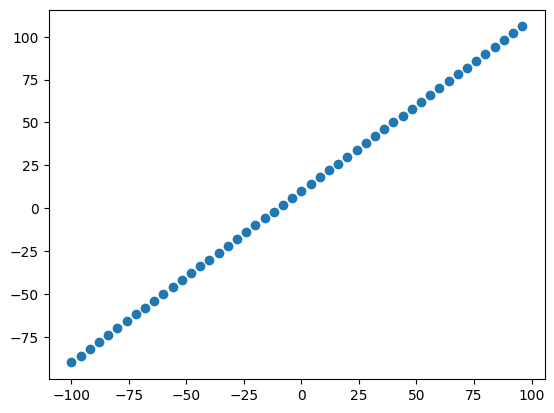

In [36]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### **The 3 sets**
* **Training set -** the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set -** the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set -** the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [37]:
# Check the length of how many samples we have
len(X)

50

In [38]:
# Split the data into train and test sets
X_train = X[0:40]   # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:]   # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualizing the data
* Now, we'he got our data in training and test sets. Let's visualize it again!

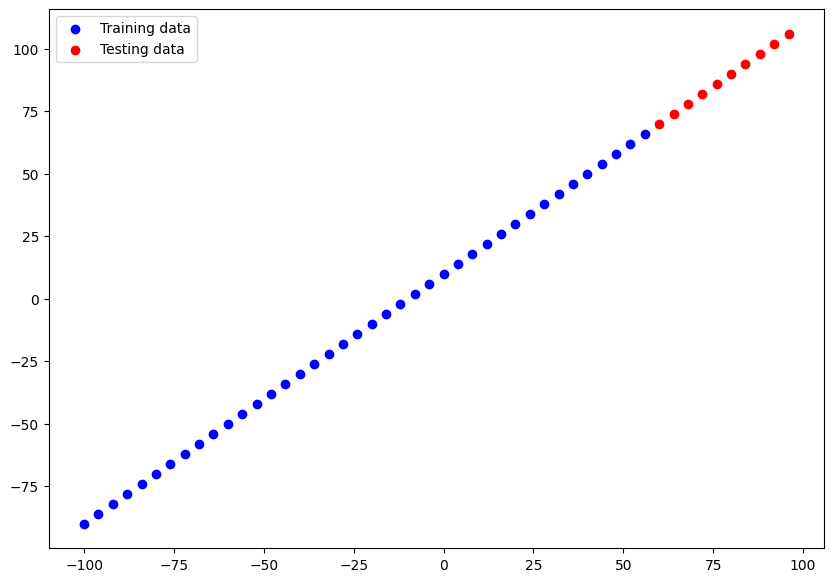

In [39]:
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot test data in red
plt.scatter(X_test, y_test, c="r", label="Testing data")

# Show a legend
plt.legend();

In [40]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 14.3809 - mae: 14.3809 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.6461 - mae: 8.6461
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.1149 - mae: 10.1149
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 11.8355 - mae: 11.8355
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.7559 - mae: 8.7559
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10.2246 - mae: 10.2246
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.9900 - mae: 11.9900
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 12.6901 - mae: 12.6901
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.1744 - mae: 8.1744
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.8393 - mae: 8.8393
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.7657 - mae: 7.7657
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 10.7702 - mae: 10.7702
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━

In [41]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

* **Total params** - total number of parameters in the model.
* **Trainable params** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable params** - these parameters aren't updated during training (this is typical when we bring in already learn patterns or parameters from other models during **transfer learning**).

🎬**Resource:** For a more in-depth overview of the trainable parameters within a layer: **MIT's introduction to deep learning video** https://www.youtube.com/watch?v=alfdI7S6wCY



In [43]:
# We will change the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling "model.summary()"
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [44]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 3)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

In [45]:
print(X_train.ndim)

1


In [46]:
# Let's test our model
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Let's fit our model to the training data
model.fit(X_train, tf.expand_dims(y_train, axis=-1), epochs=100, verbose=1) # Reshape the dimension of y_train to match output

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 15.4103 - mae: 15.4103 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 9.7839 - mae: 9.7839
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.6828 - mae: 7.6828
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.0268 - mae: 8.0268
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8.0918 - mae: 8.0918
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.9764 - mae: 7.9764
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.8347 - mae: 7.8347
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.7423 - mae: 7.7423
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.7989 - mae: 7.7989
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.7803 - mae: 7.7803
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.6735 - mae: 7.6735
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.7261 - mae: 7.7261
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/

In [47]:
# Get a summary of our model
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 3)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8 (36.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

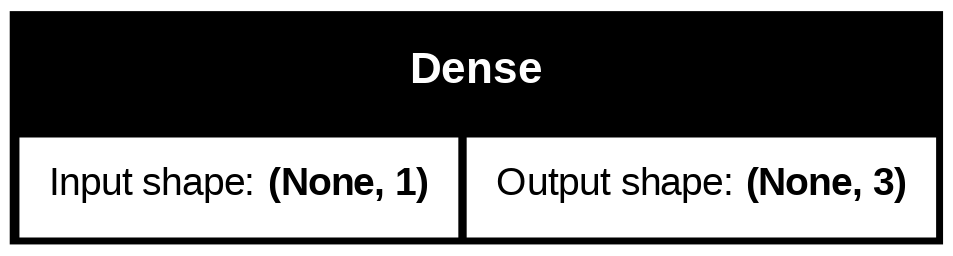

In [50]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

In [51]:
# Let's test our model
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Let's fit our model to the training data
model.fit(X_train, tf.expand_dims(y_train, axis=-0), epochs=100, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 40
'y' sizes: 1
